In [38]:
import librosa
import numpy as np
import configparser
import matplotlib.pyplot as plt
from librosa import display

In [32]:
config = configparser.ConfigParser()
config.read('project/config/config-gpu.ini')

['project/config/config-gpu.ini']

In [33]:
import h5py
from pathlib import Path

In [34]:
dataset_file = h5py.File(Path('data/dataset_spectogram.hdf5'), 'r')

In [35]:
print(dataset_file['blues']['blues.00000.wav'][()])

[[[1.        ]
  [0.9496741 ]
  [0.7518278 ]
  ...
  [0.56153476]
  [0.63539094]
  [0.80151796]]

 [[0.9755326 ]
  [1.        ]
  [0.8919034 ]
  ...
  [0.90919137]
  [0.86299944]
  [0.8131355 ]]

 [[0.81109285]
  [0.822876  ]
  [0.8538806 ]
  ...
  [0.89001554]
  [0.8471017 ]
  [0.86675966]]

 ...

 [[0.        ]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]]


In [64]:
a = dataset_file['blues']['blues.00009.wav'][()]
b = a.reshape((a.shape[0]*a.shape[2]), a.shape[1])

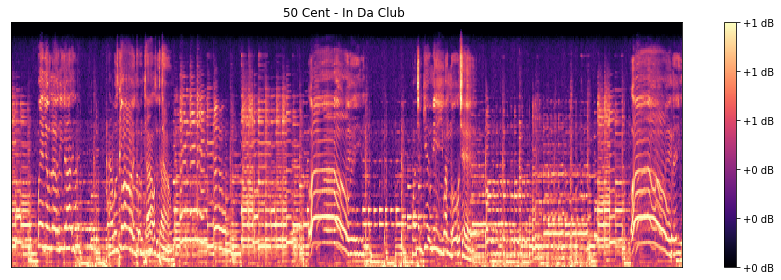

In [65]:
plt.figure(figsize=(12,4))
librosa.display.specshow(b)

plt.colorbar(format='%+2.0f dB')
plt.title('50 Cent - In Da Club ')
plt.tight_layout()

In [58]:
b

array([[0.7814362 , 0.7259452 , 0.72310066, ..., 0.8549568 , 0.80932665,
        0.8578166 ],
       [0.7610749 , 0.7056774 , 0.66464794, ..., 0.75710094, 0.8060065 ,
        0.8075743 ],
       [0.643197  , 0.6423972 , 0.72011   , ..., 0.816173  , 0.78213274,
        0.78678334],
       ...,
       [0.00842464, 0.00672781, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00357616, 0.00284636, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [1]:
import numpy as np
import pandas as pd
import configparser
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
config = configparser.ConfigParser()
config.read('project/config/config-docker.ini')

['project/config/config-docker.ini']

In [3]:
import sys
sys.path.insert(0, 'project/')
print(sys.path)

['project/', '/opt/notebooks', '/opt/conda/envs/music_clasification/lib/python37.zip', '/opt/conda/envs/music_clasification/lib/python3.7', '/opt/conda/envs/music_clasification/lib/python3.7/lib-dynload', '', '/opt/conda/envs/music_clasification/lib/python3.7/site-packages', '/opt/conda/envs/music_clasification/lib/python3.7/site-packages/IPython/extensions', '/root/.ipython']


In [4]:
from source.get_train_test_data import GetTrainTestData

In [5]:
X_train, X_test, X_val, y_train, y_test, y_val = GetTrainTestData(config).read_dataset(choice="spec")

In [6]:
X_train.shape

(750, 128, 1249, 1)

In [7]:
X_train[0].shape

(128, 1249, 1)

In [8]:
mylist = []
for img in X_train:
    new_img = img.reshape((img.shape[0]*img.shape[1]), img.shape[2]) # (1, 159872)
    new_img = new_img.transpose() # (159872, 1)
    new_img = new_img.ravel() # (159872,)
    mylist.append(new_img)

In [9]:
mat = np.array(mylist)
X = mat

In [10]:
print(X.shape, y_train.shape)
y = y_train

(750, 159872) (750,)


In [11]:
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))
X, y = None, None
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (750, 159874)


In [12]:
new_img.shape

(159872,)

In [13]:
del X_train, mylist, img, new_img,  X, y

In [14]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel159864,pixel159865,pixel159866,pixel159867,pixel159868,pixel159869,pixel159870,pixel159871,y,label
0,0.889295,0.858602,0.854784,0.914185,0.744969,0.699782,0.664745,0.618636,0.563986,0.663109,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.0,8.0
1,0.306139,0.396469,0.411544,0.420286,0.400647,0.400305,0.436229,0.470787,0.376490,0.350380,...,0.113131,0.071278,0.062129,0.140316,0.066192,0.034301,0.031893,0.000000,2.0,2.0
2,0.686968,0.605963,0.585388,0.713432,0.751452,0.778750,0.798459,0.788569,0.788914,0.792711,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.0,5.0
3,0.598486,0.621915,0.560703,0.488996,0.279875,0.240062,0.263127,0.349238,0.617389,0.755263,...,0.026597,0.000433,0.019113,0.000000,0.000000,0.000000,0.024310,0.052156,7.0,7.0
4,0.759146,0.670959,0.451297,0.451372,0.474452,0.453637,0.430103,0.466634,0.564304,0.579555,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0.626839,0.777865,0.768366,0.738587,0.756991,0.733886,0.806539,0.772512,0.821525,0.823515,...,0.000000,0.000037,0.010041,0.010779,0.001446,0.003327,0.001289,0.000000,4.0,4.0
746,0.837347,0.768393,0.686674,0.665452,0.647659,0.595637,0.585672,0.550978,0.617166,0.770995,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.0,8.0
747,0.999694,0.923180,0.947332,0.967878,0.837337,0.835709,0.820639,0.700062,0.743204,0.725045,...,0.000000,0.000000,0.000000,0.000000,0.016068,0.000000,0.000000,0.000000,1.0,1.0
748,0.725768,0.642721,0.537907,0.484555,0.689109,0.754012,0.801441,0.832175,0.806506,0.860737,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.0,6.0


In [15]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

<Figure size 432x288 with 0 Axes>

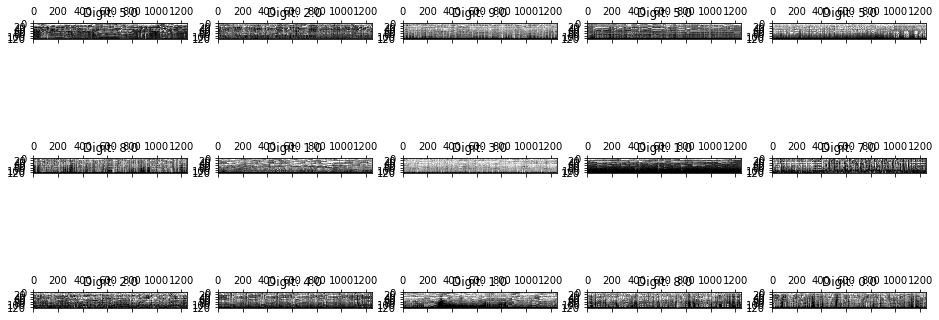

In [16]:
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'label'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((128,1249)).astype(float))
plt.show()

In [30]:
pca = PCA(n_components=0.8)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.35902628 0.04554924 0.01314958 0.01097262 0.00967104 0.00699927
 0.00625482 0.00610682 0.00521654 0.00507439 0.00471937 0.00451763
 0.00391742 0.00346967 0.00336684 0.00323638 0.00311871 0.00304153
 0.00291627 0.00285855 0.00278148 0.00274564 0.0027097  0.00257298
 0.00256668 0.00251834 0.002485   0.00243786 0.00241732 0.00230659
 0.00229343 0.00226359 0.00218844 0.00217789 0.00215837 0.00212704
 0.00206503 0.00203656 0.00203183 0.00199323 0.00197002 0.00193693
 0.00192876 0.00188593 0.00184775 0.00183401 0.00181803 0.00180099
 0.00178293 0.00176512 0.00175161 0.00174625 0.00172765 0.00169157
 0.00168716 0.00166216 0.00165942 0.00164515 0.00163758 0.00162451
 0.00161328 0.0015917  0.00158562 0.00157065 0.00155194 0.00155136
 0.00153015 0.00152727 0.00151841 0.00150957 0.00149963 0.00148921
 0.00148069 0.00147028 0.00146469 0.00144697 0.00144155 0.00143477
 0.00143102 0.00141821 0.00140741 0.00140239 0.00139854 0.00138637
 0.0013763  0.001

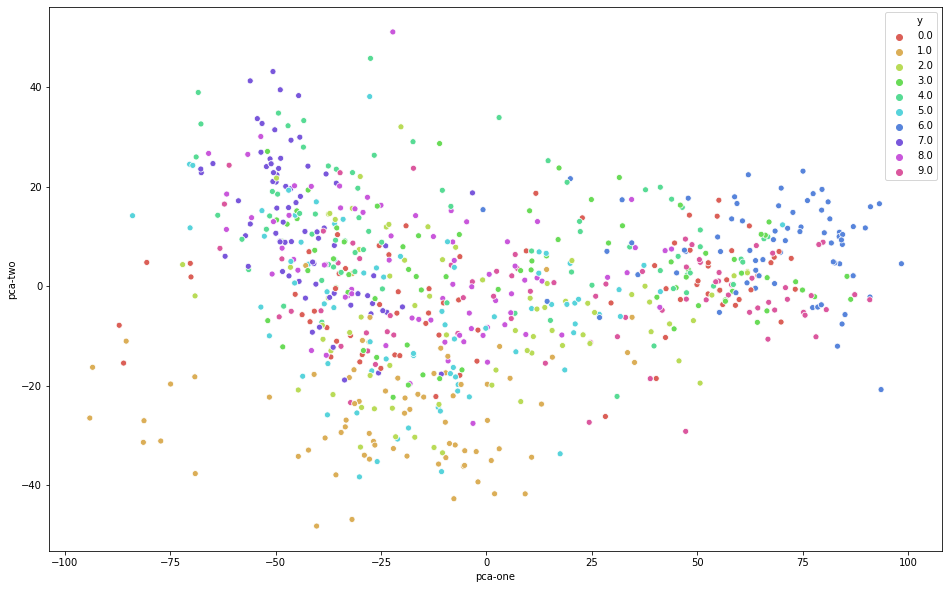

In [31]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=1
)

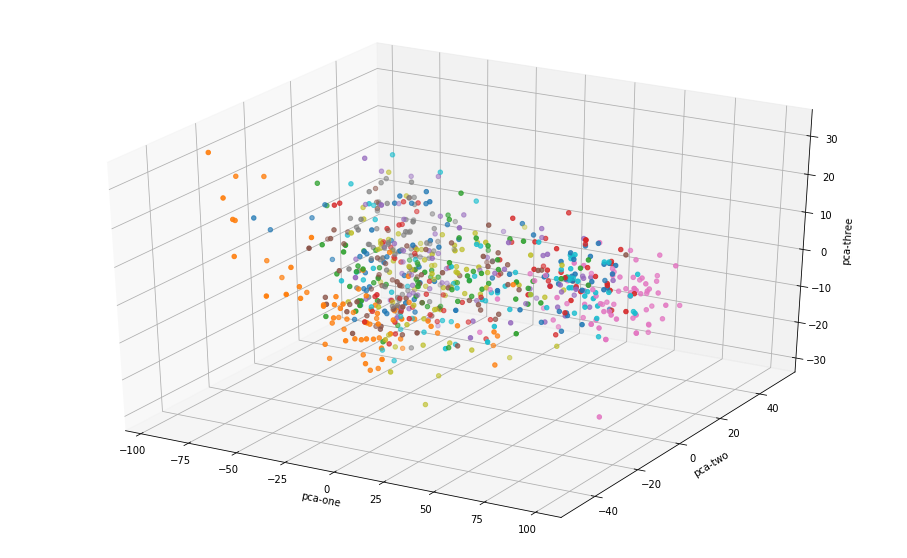

In [26]:
from mpl_toolkits.mplot3d import Axes3D
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["pca-one"], 
    ys=df.loc[rndperm,:]["pca-two"], 
    zs=df.loc[rndperm,:]["pca-three"], 
    c=df.loc[rndperm,:]["y"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [28]:
import time
N = 1000
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values
time_start = time.time()
tsne = TSNE(n_components=3, verbose=1, perplexity=10, n_iter=1000)
tsne_results = tsne.fit_transform(data_subset)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 750 samples in 9.811s...
[t-SNE] Computed neighbors for 750 samples in 288.782s...
[t-SNE] Computed conditional probabilities for sample 750 / 750
[t-SNE] Mean sigma: 12.687676
[t-SNE] KL divergence after 250 iterations with early exaggeration: 183.407104
[t-SNE] KL divergence after 1000 iterations: 4.002918


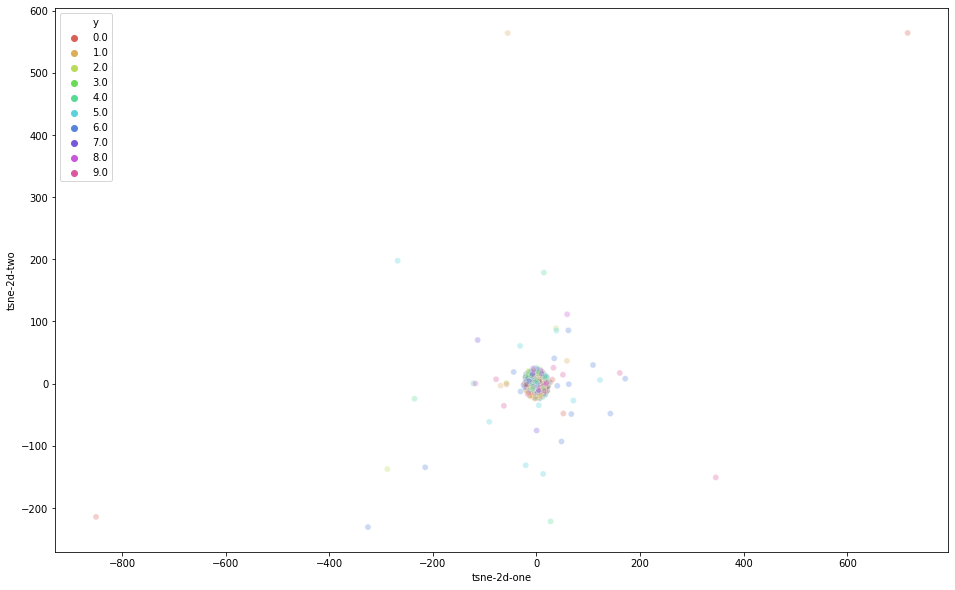

In [24]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)

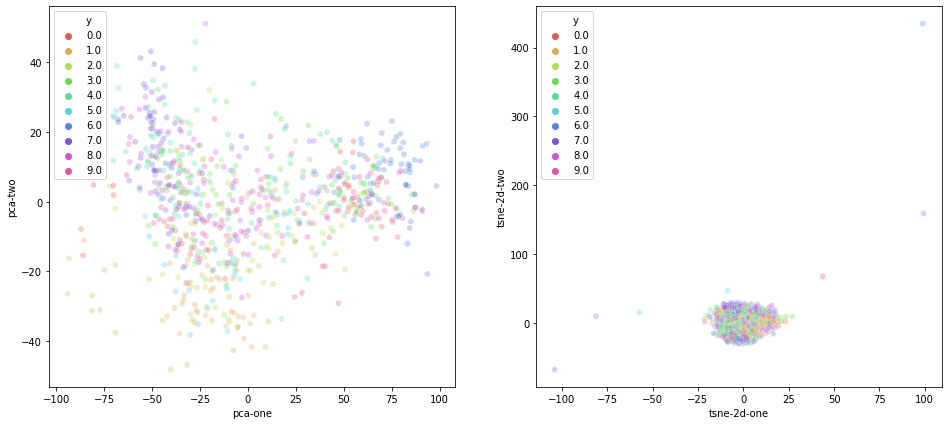

In [21]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)